In [158]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from scipy import interpolate

import grav_util_3 as gu

plt.rcParams['figure.figsize'] = (12,8)

In [167]:
fnames_test = sorted(os.listdir('simdata'), key=lambda fname: \
                     (float(fname.split('_')[1]), fname.split('_')[6]))
fnames_test

['sep_10_phi_6.269435307179586_height_-5_newt.npy',
 'sep_10_phi_6.258185307179586_height_0_newt.npy',
 'sep_10_phi_0.013125000000000001_height_5_newt.npy',
 'sep_10_phi_0.023125_height_0_newt.npy',
 'sep_10_phi_6.264435307179586_height_-5_newt.npy',
 'sep_10_phi_0.0075_height_5_newt.npy',
 'sep_10_phi_6.275685307179586_height_0_newt.npy',
 'sep_10_phi_6.256310307179586_height_-5_newt.npy',
 'sep_10_phi_0.02_height_5_newt.npy',
 'sep_10_phi_0.026250000000000002_height_5_newt.npy',
 'sep_10_phi_6.2594353071795865_height_0_newt.npy',
 'sep_10_phi_6.282560307179586_height_-5_newt.npy',
 'sep_10_phi_0.0037500000000000003_height_-5_newt.npy',
 'sep_10_phi_0.014375_height_5_newt.npy',
 'sep_10_phi_0.0275_height_5_newt.npy',
 'sep_10_phi_6.271310307179586_height_5_newt.npy',
 'sep_10_phi_6.276935307179587_height_-5_newt.npy',
 'sep_10_phi_0.00125_height_5_newt.npy',
 'sep_10_phi_6.253185307179586_height_0_newt.npy',
 'sep_10_phi_6.265060307179586_height_0_newt.npy',
 'sep_10_phi_0.02187500000

In [164]:
data = {10.0: {}, 20.0: {}, 100.0: {}}

phi_sorted = sorted(os.listdir('simdata'), key=lambda fname: float(fname.split('_')[3]))

for fname in phi_sorted:
    fname = 'simdata/'+fname
    
    sep = float(fname.split('_')[1])
    phi = float(fname.split('_')[3])
    if phi > 0.1:
        phi = phi - 2*np.pi
    height = float(fname.split('_')[5])
    force = fname.split('_')[-1].split('.')[0]
    
    if height not in data[sep].keys():
        data[sep][height] = {}
        data[sep][height]['phis'] = []
        data[sep][height]['newt'] = []
        data[sep][height]['yuka'] = []
    
    if phi not in data[sep][height]['phis']:
        data[sep][height]['phis'].append(phi)
    
    data[sep][height][force].append(np.load(fname))

In [60]:
my_dir = '/home/emmetth/gravity_sim'
os.chdir(my_dir)
os.chdir('../..')
os.chdir('/home/cblakemore/opt_lev_analysis/gravity_sim/results/')
os.getcwd()
path = '4_7um-bead_1um-unit-cells/'
Gdata = np.load(path+'Gravdata.npy')
xpos = np.load(path+'xpos.npy')
ypos = np.load(path+'ypos.npy')
zpos = np.load(path+'zpos.npy')
lin = gu.GravFuncs(path)
os.chdir(my_dir)

lambind = np.argmin(np.abs(lin.lambdas-10e-6))
lin.lambdas[lambind]

Loading Gravity Data... Done!


In [147]:
lin.rbead

2.3199999999999998e-06

In [154]:
ys = np.linspace(-249.5, 249.5, 200)
x = 10
z = 0

ones = np.ones_like(ys)
xs = ones*x
zs = ones*z

pts = np.stack((xs,ys,zs), axis=-1)*1e-6

Ngx = lin.gfuncs[0]
Ngforcex = Ngx(pts)
Ngforce_funcx = interpolate.interp1d(ys, Ngforcex)

Ygx = lin.yukfuncs[0][lambind]
Ygforcex = Ygx(pts)
Ygforce_funcx = interpolate.interp1d(ys, Ygforcex)

Ngy = lin.gfuncs[1]
Ngforcey = Ngy(pts)
Ngforce_funcy = interpolate.interp1d(ys, Ngforcey)

Ygy = lin.yukfuncs[1][lambind]
Ygforcey = Ygy(pts)
Ygforce_funcy = interpolate.interp1d(ys, Ygforcey)

In [155]:
rNg = np.array(data[10.][0]['newt'])
rYg = np.array(data[10.][0]['yuka'])
rys = 8010*np.sin(np.array(data[10.][0]['phis']))

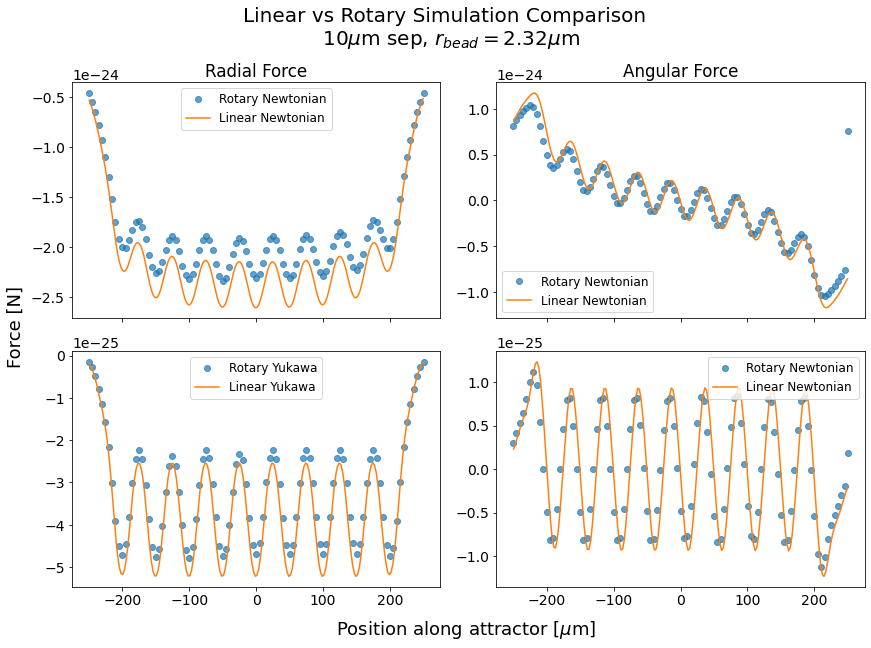

In [156]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,8))

ax[0,0].plot(rys, rNg[:,0], 'o', alpha=0.7, label='Rotary Newtonian')
ax[0,0].plot(ys, Ngforce_funcx(ys), label='Linear Newtonian')
ax[0,0].legend(fontsize=12, loc='upper center')
ax[0,0].set_title('Radial Force')

ax[0,1].plot(rys, np.flip(rNg[:,1]), 'o', alpha=0.7, label='Rotary Newtonian')
ax[0,1].plot(ys, Ngforce_funcy(ys), label='Linear Newtonian')
ax[0,1].legend(fontsize=12)
ax[0,1].set_title('Angular Force')

ax[1,0].plot(rys, rYg[:,0], 'o', alpha=0.7, label='Rotary Yukawa')
ax[1,0].plot(ys, Ygforce_funcx(ys), label='Linear Yukawa')
ax[1,0].legend(fontsize=12)

ax[1,1].plot(rys, np.flip(rYg[:,1]), 'o', alpha=0.7, label='Rotary Newtonian')
ax[1,1].plot(ys, Ygforce_funcy(ys), label='Linear Newtonian')
ax[1,1].legend(fontsize=12)

fig.suptitle('Linear vs Rotary Simulation Comparison \n 10$\mu$m sep, $r_{bead}=2.32\mu$m', y=1.07, fontsize=20)
fig.text(-0.01, 0.45, 'Force [N]', fontsize=18, rotation='vertical')
fig.text(0.37, -0.02, 'Position along attractor [$\mu$m]', fontsize=18)

fig.tight_layout()
plt.show()

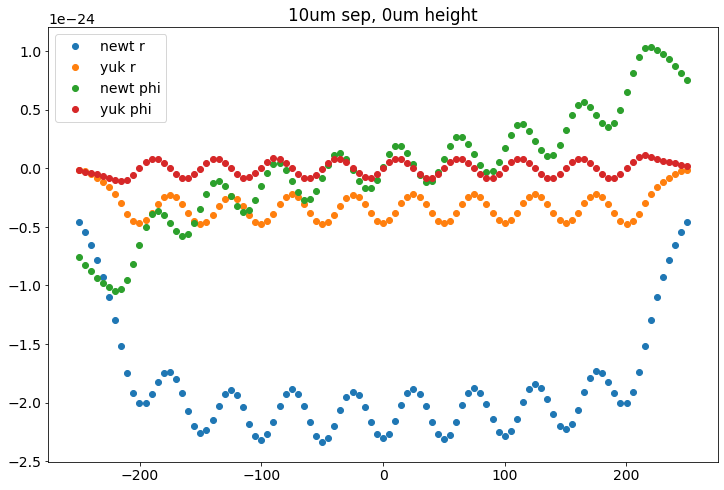

In [113]:
a = np.array(data[10.][0]['newt'])
b = np.array(data[10.][0]['yuka'])
p = 8010*np.sin(np.array(data[10.][0]['phis']))
plt.plot(p,a[:,0],'o', label='newt r')
plt.plot(p,b[:,0],'o', label='yuk r')
plt.plot(p,a[:,1],'o', label='newt phi')
plt.plot(p,b[:,1],'o', label='yuk phi')
plt.legend()
plt.title('10um sep, 0um height')
plt.show()

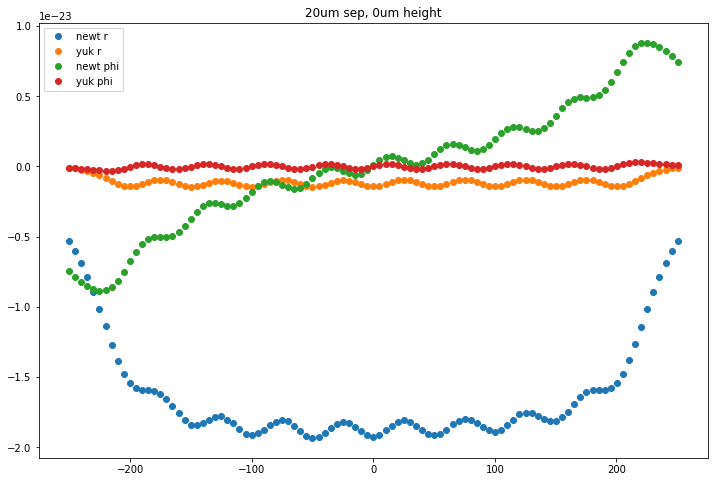

In [16]:
a = np.array(data[20.][0]['newt'])
b = np.array(data[20.][0]['yuka'])
p = 8020*np.sin(np.array(data[20.][0]['phis']))

plt.plot(p,a[:,0],'o', label='newt r')
plt.plot(p,b[:,0],'o', label='yuk r')
plt.plot(p,a[:,1],'o', label='newt phi')
plt.plot(p,b[:,1],'o', label='yuk phi')
plt.legend()
plt.title('20um sep, 0um height')
plt.show()

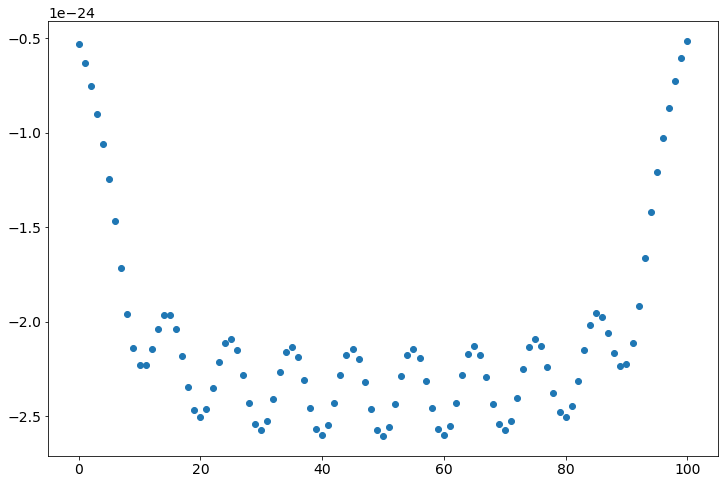

In [79]:
plt.plot(gforce_func(ys), 'o')

In [40]:
lin.rbead, lin.rhobead

(2.3199999999999998e-06, 1550.0)

In [51]:
np.array(lin.lims)*1e6

array([[   4.32,   31.32],
       [-249.5 ,  249.5 ],
       [ -20.  ,   20.  ]])